1. Source_1 ChatGPT

1.
Write a function to generate an input data matrix X of size NxD for regression.

a) Input: Sample size N and a generator matrix S of size MxD

b) Working: First generate a random 2-D array of size NxM where each column has a standard
normal distribution and is independent of the other columns. Then multiply this with the
generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that
if the generator matrix S of size MxD is an identity matrix, then each column of X will
remain independent; otherwise we can introduce correlations in the matrix columns of X.

In [ ]:
import numpy as np

def generate_data_matrix(N, S):
    """
    Generate a matrix X of size NxD by multiplying a random matrix of size NxM
    with a generator matrix S of size MxD.

    Parameters:
    N : Sample size.
    S : Generator matrix of size MxD.

    Returns:
    Output matrix X of size NxD.
    """
    M, D = S.shape # get the shape of generator matrix S
    # Generate a random matrix with standard normal distribution
    random_matrix = np.random.randn(N, M)

    # Multiply the random matrix with the generator matrix S
    X = np.dot(random_matrix, S)  # (NxM).(MxD)=NxD

    return X

# Example usage:
N = 100  # Sample size
M = 3    # Number of features in the generator matrix
D = 4    # Number of dimensions in the output matrix
S = np.random.rand(M, D)  # Generator matrix

X = generate_data_matrix(N, S)  # X is the data matrix
print("Output matrix X shape:", X.shape)


Output matrix X shape: (100, 4)


2. Write a function to generate the target vector t of size Nx1:

a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one
element) and add the bias (the excluded element), then add zero-mean Gaussian noise
with variance σ.

In [ ]:
import numpy as np

def generate_target_vector(X, w, sigma):
    """
    Generate the target vector t of size Nx1.

    Parameters:
    X : Data matrix of size NxD.
    w : Weight vector of size D+1.
    sigma : Noise variance.

    Returns:
    Target vector t of size Nx1.
    """
    N, D = X.shape

    # Check for dimension mismatch
    if D + 1 != len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w (excluding last element) and add the last element as (bais)
    t = np.dot(X, w[:-1]) + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))  # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)       # To ensure that t has it's shape retained
    t += noise.reshape(-1, 1)  # Reshape noise array to column vector and add to t

    return t

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
w = np.random.randn(D + 1)  # Weight vector
sigma = 0.1  # Noise variance

t = generate_target_vector(X, w, sigma)
print("Target vector t shape:", t.shape)


Target vector t shape: (100, 1)


 3. Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg
package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N
(use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve
the problem above a particular value of N? What could be the reason for the same?

Source used : Source_1

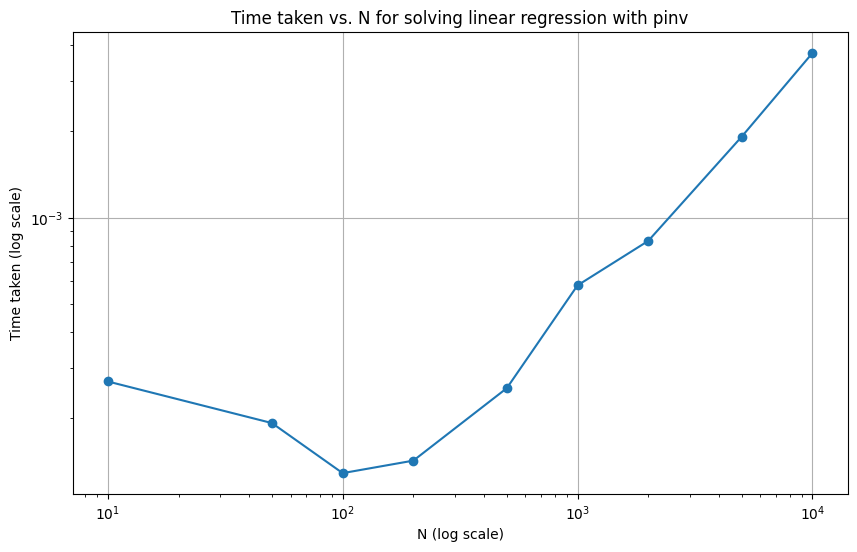

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def generate_target_vector(X, w, sigma):
    """
    Generate the target vector t of size Nx1.

    Parameters:
    X : Data matrix of size NxD.
    w : Weight vector of size D+1.
    sigma : Noise variance.

    Returns:
    Target vector t of size Nx1.
    """
    N, D = X.shape

    # Check for dimension mismatch
    if D!= len(w):
        raise ValueError("Dimension mismatch between X and w")
    b = np.random.randn() #generate bias
    # Multiply X with w  and add bais
    t = np.dot(X, w) + b

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))  # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)       # To ensure that t has it's shape retained
    t += noise.reshape(-1, 1)  # Reshape noise array to column vector and add to t

    return t

def solve_regression_pinv(X, t):
    """
    Solve linear regression using pseudo-inverse (pinv).

    Parameters:
    X : Data matrix of size NxD.
    t : Target vector of size Nx1.

    Returns:
    Weight vector of size D+1.
    """
    X_pseudo_inv = np.linalg.pinv(X)
    w = np.dot(X_pseudo_inv, t)
    return w

# Varying values of N
N_values = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

D = 10 # Fixing D to 10
M = 10 # assuming square setting M = D for making generator matrix
b = np.random.randn() #generate bias
G = np.random.rand(M, D)  # Generator matrix
sigma = 0.1  # Noise variance

# List to store time taken for each N
times = []

for N in N_values:
    # Generate data matrix X and target vector t
    X = generate_data_matrix(N,G)
    t = generate_target_vector(X, w, sigma)

    # Measure time taken to solve using pinv
    start_time = time.time()
    w = solve_regression_pinv(X, t)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(N_values, times, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Time taken vs. N for solving linear regression with pinv')
plt.xlabel('N (log scale)')
plt.ylabel('Time taken (log scale)')
plt.grid(True)
plt.show()



We can observe that there is a value of n after which the computation time increases drastically this could be due to Memory contrains and Algorithmic complexity. As the size of N increase the storing and computing the pseudo inv increase. The available memory become insufficient, leading to increased swapping between RAM and disk leading to increase in computation time.
The computational complexity of computing the pseudo-inverse using the SVD (Singular Value Decomposition) method, which is commonly used in numpy.linalg.pinv, is approximately
(
2
)
O(N⋅D
2
 ), where
N is the number of samples and
D is the number of features. While this is generally efficient, there may be a point where the computational cost becomes prohibitive for larger
N and
D.

4. Write a function to calculate the normalized root mean squared error (NRMSE) between a target
vector t and a predicted vector y.

In [ ]:
import numpy as np

def calculate_nrmse(t, y):
    """
    Calculate the Normalized Root Mean Squared Error (NRMSE) between a target vector t
    and a predicted vector y.

    Parameters:
    t (numpy.ndarray): Target vector.
    y (numpy.ndarray): Predicted vector.

    Returns:
    float: NRMSE value.
    """
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(np.mean((t - y) ** 2))

    # Calculate range of the target vector
    target_range = np.max(t) - np.min(t)

    # Calculate NRMSE
    nrmse = rmse / target_range

    return nrmse

# Example usage:
t = np.array([1, 2, 3, 4, 5])  # Target vector
y = np.array([1.1, 1.9, 2.8, 4.2, 4.9])  # Predicted vector

nrmse = calculate_nrmse(t, y)
print("NRMSE:", nrmse)


NRMSE: 0.037080992435478334


5. Write a function to calculate gradient of mean squared error (MSE) with respect to weights of
linear regression. Figure out what should be the inputs and outputs.

Source : Self

In [ ]:
import numpy as np

def calculate_mse_gradient(X, t, w):
    """
    Calculate the gradient of Mean Squared Error (MSE) with respect to the weights of linear regression.

    Parameters:
    X : Data matrix of size NxD.
    t : Target vector of size Nx1.
    w : Weight vector of size D+1.

    Returns:
    Gradient vector of size D+1.
    """
    N, D = X.shape

    # Add bias term to data matrix X
    X_bias = np.concatenate((X, np.ones((N, 1))), axis=1)

    # Calculate predicted target values
    y = np.dot(X_bias, w)

    # Calculate gradient of MSE with respect to weights
    mse_gradient = np.dot(X_bias.T, (y - t)) * (2 / N)

    return mse_gradient

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
t = np.random.randn(N, 1)  # Target vector
w = np.random.randn(D + 1)  # Weight vector (including bias)

mse_gradient = calculate_mse_gradient(X, t, w)
print("Gradient of MSE with respect to weights:", mse_gradient)


Gradient of MSE with respect to weights: [[-3.41181078e-02 -1.35467123e-01  4.03856951e-02 -7.84113290e-02
   1.02126583e-01 -1.75896944e-01  3.40922224e-02  3.46682410e-01
   3.87811731e-02  2.15898701e-01 -3.33321180e-01 -2.84737754e-01
  -2.34451956e-01  2.22664113e-01 -8.95088232e-03 -1.54514866e-01
   2.99951954e-02 -1.49531762e-01 -7.82959049e-02 -1.59252811e-01
  -8.09131152e-02  1.57805447e-01 -3.00961329e-01 -4.46222380e-02
   2.16043854e-01 -1.75003441e-01  2.14924535e-01 -8.35604680e-02
  -1.58432097e-01  1.54247938e-02  5.84388432e-02  2.27691474e-01
  -9.53294880e-02  4.76460350e-02 -3.40105745e-01  7.63541560e-02
  -9.37529163e-02 -7.07873877e-02  4.02004247e-02 -3.74610925e-01
   4.48356636e-02  1.14568299e-01 -6.91449060e-02 -1.95079528e-01
   6.13176765e-02  4.04682728e-02 -6.28763094e-02 -1.31227517e-02
   1.68916386e-02 -1.39871298e-01 -2.82654845e-01 -2.43033487e-02
   3.92633054e-02 -2.18077340e-02 -2.72789728e-01 -3.15676849e-01
  -6.03877153e-02 -5.75705426e-02  

6. Write a function to calculate gradient of L2 norm of weights with respect to weights.

Source: Self

In [ ]:
import numpy as np

def calculate_l2_norm_gradient(w):
    """
    Calculate the gradient of L2 norm of weights with respect to the weights.

    Parameters:
    w  Weight vector.

    Returns:
     Gradient vector of the same size as w.
    """
    # Calculate gradient of L2 norm with respect to weights
    l2_norm_gradient = 2 * w

    return l2_norm_gradient

# Example usage:
w = np.array([1, 2, 3, 4])  # Weight vector

l2_norm_gradient = calculate_l2_norm_gradient(w)
print("Gradient of L2 norm with respect to weights:", l2_norm_gradient)


7. Write a function to calculate gradient of L1 norm of weights with respect to weights.

Source : self

In [ ]:
import numpy as np

def calculate_l1_norm_gradient(w):
    """
    Calculate the subgradient of L1 norm of weights with respect to the weights.

    Parameters:
    w  Weight vector.

    Returns:
    Subgradient vector of the same size as w.
    """
    l1_norm_gradient = np.sign(w) # Source_1 calculating the l1_norm_gradient
    return l1_norm_gradient

# Example usage:
w = np.array([1, -2, 3, 0, -4])  # Weight vector

l1_norm_gradient = calculate_l1_norm_gradient(w)
print("Subgradient of L1 norm with respect to weights:", l1_norm_gradient)


Subgradient of L1 norm with respect to weights: [ 1 -1  1  0 -1]


8. Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use an
appropriate stopping criterion.

Source: "self" if not commented

In [ ]:
import numpy as np

def gradient_descent_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol):
    """
    Perform gradient descent on MSE + λ1 L1 + λ2 L2 regularized linear regression.

    Parameters:
    X: Data matrix of size NxD.
    t :Target vector of size Nx1.
    lambda1 :L1 regularization hyperparameter.
    lambda2: L2 regularization hyperparameter.
    learning_rate :Learning rate for gradient descent.
    max_iters : Maximum number of iterations.
    tol: Tolerance value for stopping criterion.

    Returns:
    Optimal weight vector.
    """
    N, D = X.shape
    w = np.zeros((D, 1))  # Initialize weights to zeros
    prev_loss = float('inf')  # Initialize previous loss to infinity

    for i in range(max_iters):
        # Calculate predicted target values
        y = np.dot(X, w)

        # Calculate gradients of MSE, L1, and L2 regularization terms
        mse_gradient = 2 * np.dot(X.T, (y - t)) / N
        l1_reg_gradient = lambda1 * np.sign(w)
        l2_reg_gradient = 2 * lambda2 * w

        # Total gradient
        total_gradient = mse_gradient + l1_reg_gradient + l2_reg_gradient

        # Update weights
        w -= learning_rate * total_gradient

        # Calculate loss
        loss = np.mean((y - t) ** 2) + lambda1 * np.sum(np.abs(w)) + lambda2 * np.sum(w ** 2) # Source_1

        # Check for convergence Source_1
        if np.abs(prev_loss - loss) < tol:
            print(f"Converged after {i+1} iterations.")
            break

        # Update previous loss
        prev_loss = loss

    return w

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix
t = np.random.randn(N, 1)  # Target vector
lambda1 = 0.01  # L1 regularization hyperparameter
lambda2 = 0.01  # L2 regularization hyperparameter
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000  # Maximum number of iterations
tol = 1e-6  # Tolerance for stopping criterion

optimal_weights = gradient_descent_regularized(X, t, lambda1, lambda2, learning_rate, max_iters, tol)
print("Optimal weights:", optimal_weights)


Converged after 239 iterations.
Optimal weights: [[-0.11777132]
 [ 0.00453941]
 [ 0.15906686]]


9. Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
results of the following experiment run five times for each value of σ where G is an identity matrix.
Generate a random data matrix X and target vector t with noise variance σ, and split it into training
and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and
test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.
Comment on the results.

Source : "Self" if not commented

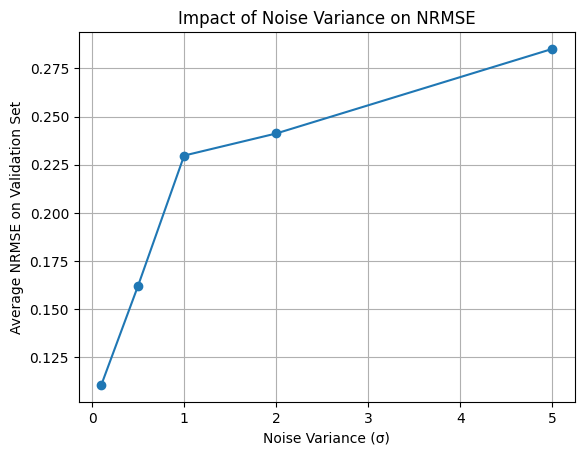

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, G, sigma):
    """
    Generate random data matrix X and target vector t with noise variance sigma.

    Parameters:
    N : Number of samples.
    D : Number of features.
    sigma : Noise variance.

    Returns:
    Tuple containing data matrix X and target vector t.
    """

    M, D = G.shape
    # Generate a random matrix with standard normal distribution
    random_matrix = np.random.randn(N, M)

    # Multiply the random matrix with the generator matrix G
    X = np.dot(random_matrix, G)

    N, D = X.shape
    w = np.random.randn(D + 1)  # Weight vector

    # Check for dimension mismatch
    if D + 1 != len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w (excluding last element) and add the last element(bais)
    t = np.dot(X, w[:-1]) + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))  # Source_1 generate a gaussain noise array of size N
    t = t.reshape(-1, 1) # Source_1 reshape to prevent mismatch
    t += noise.reshape(-1, 1)  # Reshape noise to column vector and add to t

    return X, t

def split_data(X, t, train_ratio=0.8):
    """
    Split data into training and validation subsets.

    Parameters:
    X  Data matrix.
    t : Target vector.
    train_ratio : Ratio of training data.

    Returns:
    Tuple containing training and validation subsets of X and t.
    """
    N = X.shape[0]
    train_size = int(N * train_ratio)
    X_train, t_train = X[:train_size], t[:train_size] # Source_1 distribute the train and test set
    X_val, t_val = X[train_size:], t[train_size:]
    return X_train, t_train, X_val, t_val

def gradient_descent(X_train, t_train, learning_rate, max_iters, tol):
    """
    Perform gradient descent for linear regression.

    Parameters:
    X_train: Training data matrix.
    t_train : Training target vector.
    learning_rate: Learning rate for gradient descent.

    max_iters: Maximum number of iterations.
    tol: Tolerance for stopping criterion.

    Returns:
    Optimal weight vector.
    """
    N, D = X_train.shape
    w = np.zeros((D, 1))  # Initialize weights to zeros
    prev_loss = float('inf')  # Initialize previous loss to infinity # Source_1

    for i in range(max_iters):
        y = np.dot(X_train, w)
        mse_gradient = 2 * np.dot(X_train.T, (y - t_train)) / N
        w -= learning_rate * mse_gradient

        loss = np.mean((y - t_train) ** 2)
        if np.abs(prev_loss - loss) < tol:  #Source_1 for stopping after reaching threshold
            break
        prev_loss = loss

    return w

def calculate_nrmse(y_true, y_pred):
    """
    Calculate Normalized Root Mean Squared Error (NRMSE).

    Parameters:
    y_true True target vector.
    y_pred Predicted target vector.

    Returns:
    NRMSE value.
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2)) # calculate rmse
    target_range = np.max(y_true) - np.min(y_true) #calculate target_range Source_1
    nrmse = rmse / target_range # divide to get nrmse
    return nrmse

# Parameters
N = 100  # Number of samples
D = 5    # Number of features
M = 5   # Number of features in the generator matrix (since G is identity matrix)
# G = np.random.rand(M, D)  # Generator matrix
G = np.identity(D, dtype = float)  # Since generator matrix is identity

sigma_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Noise variance values
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion
train_ratio = 0.8     # Ratio of training data

# Perform experiment for each value of sigma 5 times and store avg results in an array for each sigma
average_nrmse_results = []

for sigma in sigma_values:
    nrmse_results = []
    for _ in range(5):  # Repeat experiment five times
        # Generate data
        X, t = generate_data(N, G, sigma)
        X_train, t_train, X_val, t_val = split_data(X, t, train_ratio)

        # Train model using gradient descent
        w = gradient_descent(X_train, t_train, learning_rate, max_iters, tol)

        # Predict on validation set
        y_val_pred = np.dot(X_val, w)

        # Calculate NRMSE
        nrmse = calculate_nrmse(t_val, y_val_pred)
        nrmse_results.append(nrmse)   # Source_1

    # Average NRMSE over the five runs
    average_nrmse = np.mean(nrmse_results)
    average_nrmse_results.append(average_nrmse)

# Plot average NRMSE versus sigma Source_1
plt.plot(sigma_values, average_nrmse_results, marker='o')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE on Validation Set')
plt.title('Impact of Noise Variance on NRMSE')
plt.grid(True)
plt.show()


Comment: The NRMSE increases as the noise variance is increased.This was expected as higher variance means a greater level of uncertainty or randomness in the target variable, which makes it challenging for the model to predict accurately and increases error.

10. Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.
Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following
experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and
noise variance σ. Comment on the results.

Source : "self" if not commented

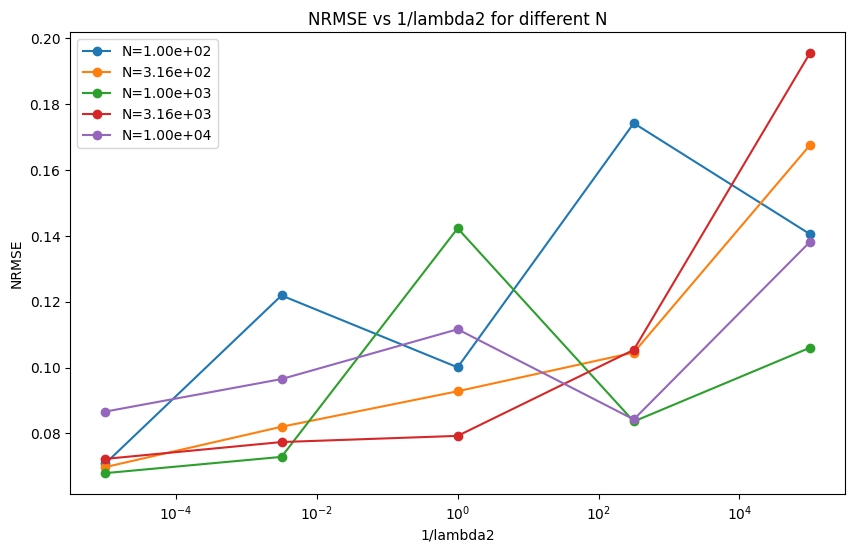

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Same function as before
def generate_data(N, G, sigma):
    """
    Generate random data matrix X and target vector t with noise variance sigma.

    Parameters:
    N : Number of samples.
    D : Number of features.
    sigma : Noise variance.

    Returns:
    Tuple containing data matrix X and target vector t.
    """

    M, D = G.shape
    # Generate a random matrix with standard normal distribution
    random_matrix = np.random.randn(N, M)

    # Multiply the random matrix with the generator matrix G
    X = np.dot(random_matrix, G)

    N, D = X.shape
    w = np.random.randn(D + 1)  # Weight vector

    # Check for dimension mismatch
    if D + 1 != len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w (excluding last element) and add the last element(bais)
    t = np.dot(X, w[:-1]) + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))         # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)
    t += noise.reshape(-1, 1)  # Reshape noise to column vector and add to t

    return X, t

# Same function as before
def split_data(X, t, train_ratio=0.8):
    """
    Split data into training and validation subsets.

    Parameters:
    X (numpy.ndarray): Data matrix.
    t (numpy.ndarray): Target vector.
    train_ratio (float): Ratio of training data.

    Returns:
    tuple: Tuple containing training and validation subsets of X and t.
    """
    N = X.shape[0]
    train_size = int(N * train_ratio)
    X_train, t_train = X[:train_size], t[:train_size]
    X_val, t_val = X[train_size:], t[train_size:]
    return X_train, t_train, X_val, t_val

def gradient_descent(X_train, t_train, lambda2, learning_rate, max_iters, tol):
    """
    Perform gradient descent for linear regression with L2 regularization.

    Parameters:
    X_train : Training data matrix.
    t_train : Training target vector.
    lambda2 : L2 regularization parameter.
    learning_rate : Learning rate for gradient descent.
    max_iters : Maximum number of iterations.
    tol : Tolerance for stopping criterion.

    Returns:
    Optimal weight vector.
    """
    N, D = X_train.shape
    w = np.zeros((D, 1))  # Initialize weights to zeros
    prev_loss = float('inf')  # Initialize previous loss to infinity Source_1

    for i in range(max_iters):
        # y = np.dot(X_train, w)
        # mse_gradient = 2 * np.dot(X_train.T, (y - t_train)) / N
        # lambda2_scalar = lambda2.reshape(())
        # w -= learning_rate * (mse_gradient + 2 * lambda2_scalar * w)     # w= w-k(mse gradient + (2*lambda)*w)

        y = np.dot(X_train, w)
        mse_gradient = 2 * np.dot(X_train.T, (y - t_train)) / N
        w -= learning_rate * mse_gradient

        loss = np.mean((y - t_train) ** 2) + lambda2 * np.sum(w ** 2)
        if np.abs(prev_loss - loss) < tol:  # Source_1
            break
        prev_loss = loss

    return w

def calculate_nrmse(y_true, y_pred):
    """
    Calculate Normalized Root Mean Squared Error (NRMSE).

    Parameters:
    y_true : True target vector.
    y_pred : Predicted target vector.

    Returns:
    NRMSE value.
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    target_range = np.max(y_true) - np.min(y_true)
    nrmse = rmse / target_range
    return nrmse

# Parameters
D = 5                 # Number of features
M = 5   # Number of features in the generator matrix (since G is identity matrix)
G = np.random.rand(M, D)  # Generator matrix
sigma = 0.5           # Noise variance
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion Source_1
train_ratio = 0.8     # Ratio of training data
lambda2_values = np.logspace(-5, 5, num=5)  # Lambda2 values (log scale) Source_1
N_values = np.logspace(2, 4, num=5, dtype=int)  # N values (log scale) Source_1

# Perform experiment for each combination of N and lambda2
average_nrmse_results = np.zeros((len(N_values), len(lambda2_values)))  #matrix initialized with zeros

for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        nrmse_results = []
        for _ in range(5):  # Repeat experiment five times
            # Generate data
            G = np.eye(D)  # Identity matrix as generator matrix Source_1
            X, t = generate_data(N, G, sigma)
            X_train, t_train, X_val, t_val = split_data(X, t, train_ratio)

            # Train model using gradient descent
            w = gradient_descent(X_train, t_train, lambda2, learning_rate, max_iters, tol)

            # Predict on validation set
            y_val_pred = np.dot(X_val, w)

            # Calculate NRMSE
            nrmse = calculate_nrmse(t_val, y_val_pred)
            nrmse_results.append(nrmse)

        # Average NRMSE over the five runs
        average_nrmse = np.mean(nrmse_results)
        average_nrmse_results[i, j] = average_nrmse

# Plot average NRMSE versus N and lambda2    vary lambda and show plot for a fixed N, x axis should be 1/lambda2 y should be NRMSE for fixed N
plt.figure(figsize=(10, 6))
for j, N in enumerate(N_values):
    plt.plot(1/lambda2_values, average_nrmse_results[:, j], marker='o', label=f'N={N:.2e}')  # taking the jth entry of "average_nrmse_results" out of N_values Source_1

plt.xlabel('1/lambda2')
plt.ylabel('NRMSE')
plt.xscale('log')
plt.title('NRMSE vs 1/lambda2 for different N')
plt.legend()
plt.show()

As N increases the avg. NRMSE decreases as larger datasets provide more information for the model to learn from, which leads better predictions.

The observed decrease in NRMSE with increasing λ2 suggests that regularization is playing a beneficial role in improving the performance of the linear regression model

11. Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot
weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat
the experiment. Are the results different? Comment on the results.

Source : self if not commented

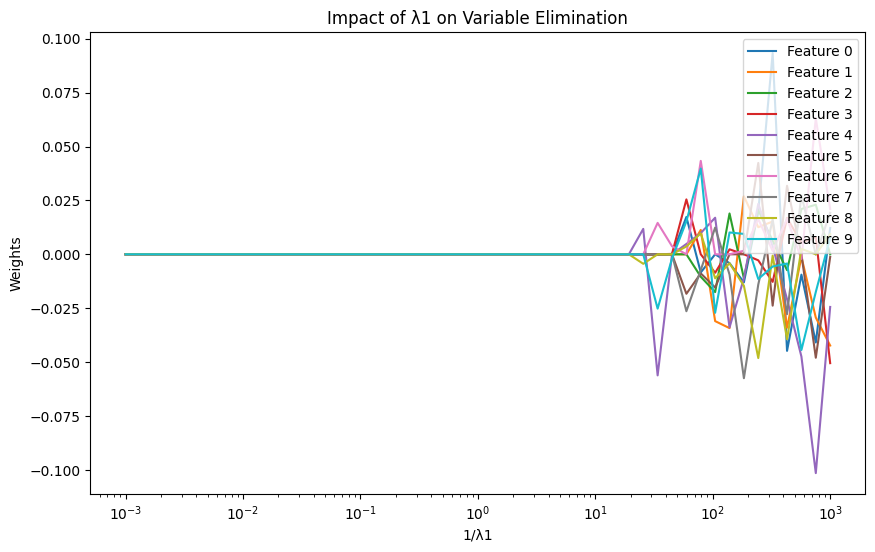

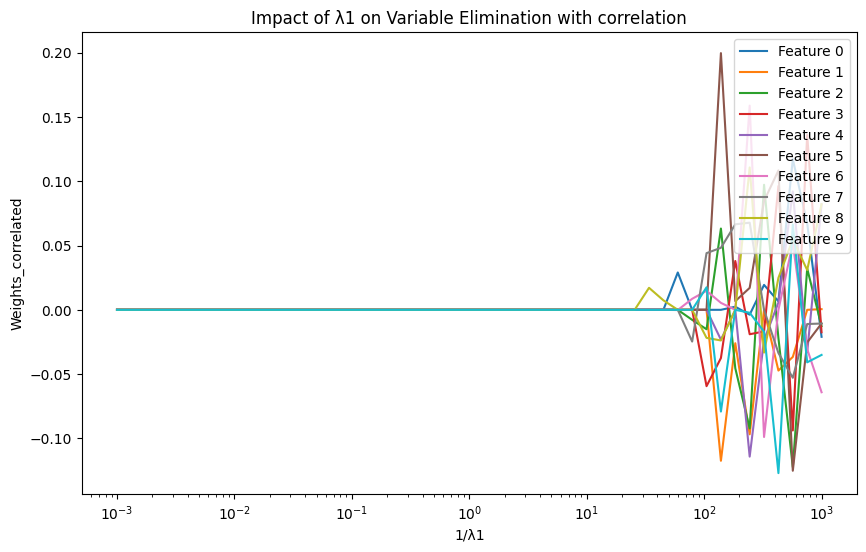

In [ ]:
from sklearn.linear_model import Lasso

#Generate a single data matrix X
N = 1000  # Number of samples
D = 10    # Number of features

# Generate a data matrix X with no correlations
X = np.random.randn(N, D)


# Generate a data matrix X with correlations Source_1
cov_matrix = np.eye(D) + 0.8 * (np.ones((D, D)) - np.eye(D))
X_correlated = np.random.multivariate_normal(np.zeros(D), cov_matrix, size=N)

# Defining a range of λ1 values
lambda1_values = np.logspace(-3, 3, num=50)

# Train models for each λ1 value and record weights
weights = []
weights_correlated = []

# This is for Non-Correlated X
for lambda1 in lambda1_values:
    # Train Lasso regression model with L1 regularization
    model = Lasso(alpha=lambda1, max_iter=10000)
    model.fit(X, np.random.randn(N))  # Random target variable for demonstration
    weights.append(model.coef_)

# weights versus 1/λ1
plt.figure(figsize=(10, 6))
plt.plot(1/lambda1_values, weights)
plt.xlabel('1/λ1')
plt.ylabel('Weights')
plt.title('Impact of λ1 on Variable Elimination')
plt.xscale('log')
plt.legend(['Feature ' + str(i) for i in range(D)], loc='upper right') #Source_1
plt.show()

# This is for Correlated X
for lambda1 in lambda1_values:
    # Train Lasso regression model with L1 regularization
    model = Lasso(alpha=lambda1, max_iter=10000)
    model.fit(X_correlated, np.random.randn(N))  # Random target variable for demonstration
    weights_correlated.append(model.coef_)

# weights versus 1/λ1
plt.figure(figsize=(10, 6))
plt.plot(1/lambda1_values, weights_correlated)
plt.xlabel('1/λ1')
plt.ylabel('Weights_correlated')
plt.title('Impact of λ1 on Variable Elimination with correlation')
plt.xscale('log')
plt.legend(['Feature ' + str(i) for i in range(D)], loc='upper right')
plt.show()

Observation: As 1/lambda1 decreases the effect of regulariztion increases, This leads to stronger penalization of coefficients, causing some of them to shrink towards zero. Features with smaller weights are eliminated from the model as lambda1 increases.

Correlated vs non correlated X
- Both are not similar
- Highly correlated features are either all retained or all eliminated together
- Highly correlated features tend to have similar weights
- Whereas this is not the case with non correlated X.

12. Show the grouping effect of elastic net on correlated columns of X.


Source: "Self" if not commented

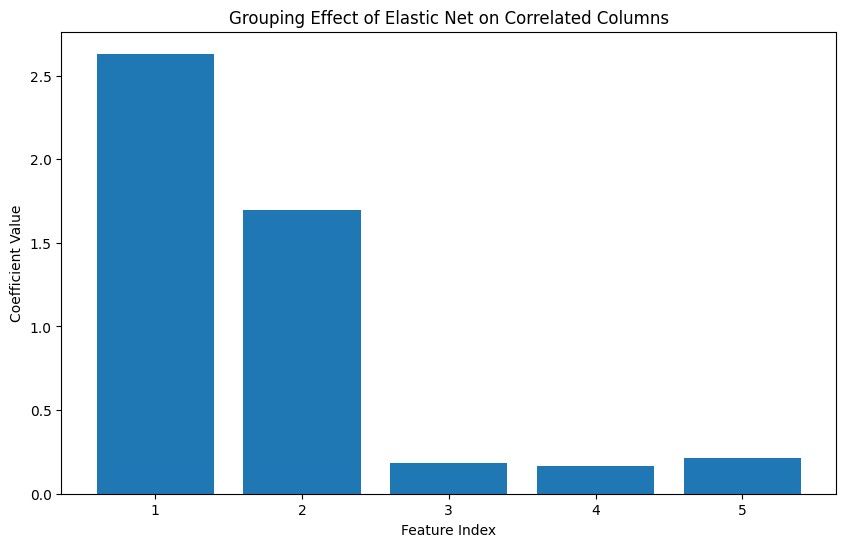

In [ ]:
from sklearn.linear_model import ElasticNet

# Generate correlated features
N = 1000  # Number of samples
D = 5     # Number of features

# Source_1 # generate covariance matrix
cov_matrix = np.eye(D) + 0.8 * (np.ones((D, D)) - np.eye(D))
X = np.random.multivariate_normal(np.zeros(D), cov_matrix, size=N)

# Define true coefficients
true_coefs = np.zeros(D)
true_coefs[:2] = [3, 2]  # Only first two features are relevant

# Generate target variable
y = np.dot(X, true_coefs) + np.random.randn(N)  # Add noise

# Source_1 # Apply Elastic Net regularization
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Elastic Net model
enet.fit(X, y)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(np.arange(D), enet.coef_) #Source_1
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Grouping Effect of Elastic Net on Correlated Columns')
plt.xticks(np.arange(D), np.arange(D) + 1)
plt.show()

 13. Write a function for generating linear binary classification vector t with noise variance σ.

 - Generate a feature matrix X of size N×D, where N is the number of samples and D is the number of features.
 - Generate a weight vector
w of size
D×1 and a bias term b.
 - Calculate the dot product of X and w, add the bias term b.
 - Add the noise term
 - Threshold the value obtained to 0 or 1

Soucre : "self" if not commented

In [ ]:
import numpy as np

def binary_classification_target_vector(X, w, b, sigma):

    N, D = X.shape

    # Check for dimension mismatch
    if D!= len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w and add the bais
    t = np.dot(X, w) + b

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))  # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)  #Source_1 to prevent dimention mismatch
    t += noise.reshape(-1, 1)  # Reshape to column vector
    # Thresholding t as 0 or 1
    binary_t = (t>0).astype(int)  # (t>0) creates a boolean array and astype(int) convert it into an integer array where False=0 and True=1 #Source_1
    return binary_t

# Example usage:
N = 100  # Number of samples
D = 3    # Number of features
X = np.random.randn(N, D)  # Data matrix random
w = np.random.randn(D)  # Weight vector random
b = np.random.randn(1)
sigma = 0.1  # Noise variance

t = binary_classification_target_vector(X, w, b, sigma)
print("Target vector t shape:", t.shape)
print("Target vector t", t)

Target vector t shape: (100, 1)
Target vector t [[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]


14. Write a function for computing gradient of binary cross-entropy for logistic regression.

Source : self if not commented

In [ ]:
import numpy as np

def binary_cross_entropy_gradient(X, t, w):

    N, D = X.shape

    # Calculate the sigmoid function
    z = np.dot(X, w)
    sigmoid = 1 / (1 + np.exp(-z))

    # Compute the gradient of binary cross-entropy loss function
    gradient = np.dot(X.T, sigmoid - y) / N

    return gradient


15. Repeat experiment 10 for binary classification.


Source : Self if not commented

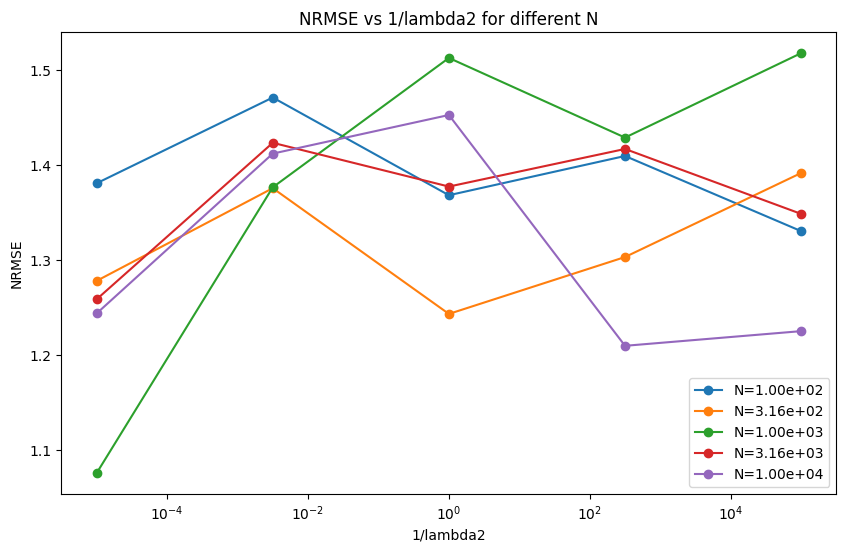

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(N, G, sigma):

    M, D = G.shape
    # Generate a random matrix with standard normal distribution
    random_matrix = np.random.randn(N, M)

    # Multiply the random matrix with the generator matrix G
    X = np.dot(random_matrix, G)

    N, D = X.shape
    w = np.random.randn(D + 1)  # Weight vector

    # Check for dimension mismatch
    if D + 1 != len(w):
        raise ValueError("Dimension mismatch between X and w")

    # Multiply X with w (excluding last element) and add the last element(bais)
    t = np.dot(X, w[:-1]) + w[-1]

    # Add zero-mean Gaussian noise with variance sigma
    noise = np.random.normal(loc=0, scale=np.sqrt(sigma), size=(N,))   # Source_1 # generate a gaussain noise array of size N
    t = t.reshape(-1, 1)  # Source_1 to prevent dimention mismatch
    t += noise.reshape(-1, 1)  # Reshape noise to column vector and add to t
    binary_t = (t>0).astype(int) # (t>0) creates a boolean array and astype(int) convert it into an integer array where False=0 and True=1
    return X, binary_t

def split_data(X, t, train_ratio=0.8):

    N = X.shape[0]
    train_size = int(N * train_ratio)
    X_train, t_train = X[:train_size], t[:train_size] #Source_1
    X_val, t_val = X[train_size:], t[train_size:]
    return X_train, t_train, X_val, t_val

def gradient_descent(X_train, t_train, lambda2, learning_rate, max_iters, tol):

    N, D = X_train.shape
    w = np.zeros((D, 1))  # Initialize weights to zeros
    prev_loss = float('inf')  # Initialize previous loss to infinity #Source_1

    for i in range(max_iters):
        # y = np.dot(X_train, w)
        # mse_gradient = 2 * np.dot(X_train.T, (y - t_train)) / N
        # lambda2_scalar = lambda2.reshape(())
        # w -= learning_rate * (mse_gradient + 2 * lambda2_scalar * w)     # w= w-k(mse gradient + (2*lambda)*w)
        # x--> z=xw+b --> sigmoid =

            # Calculate the sigmoid function
        z = np.dot(X_train, w)
        sigmoid = 1 / (1 + np.exp(-z))

        # Compute the gradient of binary cross-entropy loss function
        gradient = np.dot(X_train.T, sigmoid - t_train) / N
        w -= learning_rate * gradient

        loss = np.mean((sigmoid - t_train) ** 2) + lambda2 * np.sum(w ** 2)
        if np.abs(prev_loss - loss) < tol:  #Source_1
            break
        prev_loss = loss

    return w

def calculate_nrmse(y_true, y_pred):

    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    target_range = np.max(y_true) - np.min(y_true)
    nrmse = rmse / target_range
    return nrmse

# Parameters
D = 5                 # Number of features
M = 5   # Number of features in the generator matrix (since G is identity matrix)
G = np.random.rand(M, D)  # Generator matrix
sigma = 0.5           # Noise variance
learning_rate = 0.01  # Learning rate for gradient descent
max_iters = 1000      # Maximum number of iterations for gradient descent
tol = 1e-6            # Tolerance for stopping criterion
train_ratio = 0.8     # Ratio of training data
lambda2_values = np.logspace(-5, 5, num=5)  # Lambda2 values (log scale)
N_values = np.logspace(2, 4, num=5, dtype=int)  # N values (log scale)

# Perform experiment for each combination of N and lambda2
average_nrmse_results = np.zeros((len(N_values), len(lambda2_values)))

for i, N in enumerate(N_values):
    for j, lambda2 in enumerate(lambda2_values):
        nrmse_results = []
        for _ in range(5):  # Repeat experiment five times
            # Generate data
            G = np.eye(D)  #Source_1 # Identity matrix as generator matrix
            X, t = generate_data(N, G, sigma)
            X_train, t_train, X_val, t_val = split_data(X, t, train_ratio)

            # Train model using gradient descent
            w = gradient_descent(X_train, t_train, lambda2, learning_rate, max_iters, tol)

            # Predict on validation set
            y_val_pred = np.dot(X_val, w)

            # Calculate NRMSE
            nrmse = calculate_nrmse(t_val, y_val_pred)
            nrmse_results.append(nrmse)

        # Average NRMSE over the five runs
        average_nrmse = np.mean(nrmse_results)
        average_nrmse_results[i, j] = average_nrmse

# Plot average NRMSE versus N and lambda2    vary lambda and show plot for a fixed N, x axis should be 1/lambda2 y should be NRMSE for fixed N
plt.figure(figsize=(10, 6))

#Source_1
for j, N in enumerate(N_values):
    plt.plot(1/lambda2_values, average_nrmse_results[:, j], marker='o', label=f'N={N:.2e}')  # taking the jth entry of "average_nrmse_results" out of N_values

plt.xlabel('1/lambda2')
plt.ylabel('NRMSE')
plt.xscale('log')
plt.title('NRMSE vs 1/lambda2 for different N')
plt.legend()
plt.show()

Larger N gives lesser NRMSE as the model train better.
